<hr style="border: 8px solid#0B0B0B;" />
<br>
<div align="center">
    <img src= "ch00_data/ludwig_logos/ludwig_logo.png" align="center" width="15%">
</div>


<br>

</br>

</br>

<div align="left" style="font-size:32px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height:1.2; color:#2A2C2B">
    <strong>CHURN</strong> AND <strong>REGRESSION</strong> <br> USING <strong> SYNTHETIC DATA </strong>
</div>

<br>



**Author list:** Elias Castro Hernandez

**Learning Goal(s):** Learn to create simple synthetic data using pandas built-in functions and use the data to detect churn and predict contributions in a non-profit setting.

**Target:** Data scientists, applied machine learning engineers, and developers

**Prerequisite Knowledge:** (1) Pandas, (2) Matplotlib, (3) Seaborn

**Copyright:** Do with code as you wish.

<br>

<hr style="border: 4px solid#0B0B0B;" />


#### CONTENTS

> #### [PART 1: SYNTHETIC DATA GENERATION](#Part_1)

> #### [PART 2: CHURN ANALYSIS](#Part_2)

> #### [PART 3: REGRESSION: PREDICT CONTRIBUTIONS](#Part_3)

> #### [PART 4: DEPLOY MODEL IRL USING REST API](#Part_4)

> #### [PART 5: WRAP UP AND NEXT STEPS](#Part_5)

<a id='Part_1'></a>
<hr style="border: 4px solid#0B0B0B;" />

#### PART 1

<br>

<div align="left" style="font-size:32px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <strong>SYNTHETIC</strong> DATA <strong>GENERATION</strong>
</div>


<br>

<br>

[**Synthetic Data Generation (SDG)**](https://en.wikipedia.org/wiki/Synthetic_data) is a must know skill for every data scientist and machine learning engineer. SDG allows for the creation of datasets used to test hypotheses, train models, and create products and tools - until sufficient population data is gathered. This means that with some SDG knowledge a developer can continue to progress on a project despite any data-acquisition bottlenecks. There are several ways to create synthetic data. This notebook covers the generation of synthetic data using built-in functions that model certain distributions, as well as number generators. [Synthetic data generation using machine learning](https://towardsdatascience.com/synthetic-data-generation-a-must-have-skill-for-new-data-scientists-915896c0c1ae) is a more advanced, and statistically more robust, way of creating synthetic data. The state of the art SDG is carried out with neural networks ([Synthetic Data Generation Using Deep Learning](https://arxiv.org/abs/1909.11512))
<br>


In [34]:
# import libraries and packages
import pandas as pd
from pandas import DataFrame
import numpy as np
import datetime as dt
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz

# import  ML libraries and packages
from sklearn.preprocessing import LabelEncoder

# for random generator
import random

# plotting and pretty print
import matplotlib.pyplot as plt

# pip install plotly
# pip install cufflinks
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import csv
import seaborn as sns
sns.set(style="whitegrid")

# do not display warnings
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('data_seeds/intern_dropouts_seed.csv')
df

,Distance,GPA,Class,Gender,Ethnicity,Low-income,Sector,Churned
0,5,3.2,Sophomore,Female,Black,Yes,Arts,0
1,4,3.8,Freshman,Male,Caucasian,No,Social rights,0
2,8,3.4,Sophomore,Male,Asian,No,Elderly care,0
3,13,3.5,Senior,Female,Caucasian,Yes,Environment,1
4,9,2.8,Junior,Male,Middle Eastern,No,Health,0
5,10,3.3,Freshman,Female,Hispanic,No,Animals,0
6,2,3.6,Sophomore,Female,Caucasian,No,Education,1
7,4,3.0,Junior,Male,Black,Yes,Social rights,0
8,6,3.3,Junior,Female,Caucasian,No,Homelessness,0
9,12,3.2,Freshman,Male,Middle Eastern,Yes,Special needs,1


<hr style="border: 1px solid#0B0B0B;" />

### Functions used to generate data


In [36]:
def gen_bin_data(df, low, split, n):
    '''
        Generates list of random 0's and 1's
        @param df is list of binary data
        @param low the lower end of the bin distribution (int)
        @param split the upper end of the bin distribution (int)
        @param n is loop stop (int)
        @return is a list containing 0's and 1's of length n
    '''
    # redundancy here to ensure count is same
    n = n
    for i in range(n):        
        sampl_array = np.random.randint(low,split, size=20)
        sampl = sampl_array.tolist()
        df += sampl
    return(df)

print(gen_bin_data([], 10, 20, 1))

[18, 19, 17, 18, 13, 11, 11, 16, 17, 18, 16, 11, 11, 12, 14, 13, 19, 13, 11, 14]


In [37]:
def gen_int_data(df, low, high, n):
    '''
        Generates list of random integers from low (inclusive) to high (exclusive) and appends iterably
        @param df is list of int data
        @param low is start (int)
        @param high is stop (int)
        @param n is loop stop (int)
        @return is a list of length n
    '''
    # ensure count is same
    count = ((n)*4)
    for i in range(count):        
        sampl = random.sample(range(low, high), k=5)
        df += sampl
    
    for n, i in enumerate(df):
        if i == low:
            df[n] = random.randint(low+1,high-1)       
    return(df)

print(gen_int_data([], 1, 20, 1))

[4, 8, 19, 18, 14, 14, 5, 15, 3, 16, 2, 18, 13, 6, 11, 13, 4, 5, 12, 15]


In [38]:
def gen_flt_data(df, low, high, n):
    '''
        Generates nparray of random floats from low (inclusive) to high (inclusive) and appends iterably
        @param df is list of floats
        @param low is start (int)
        @param hight is stop (int)
        @param n is loop stop (int)
        @return is a list of length n containing random floats
    '''
    # ensure count is same
    count = ((n+1)*20)-10
    df = []
    for i in range(count): 
        # pick a float in [low, high] and then round it to one decimal
        sampl_array = round(random.uniform(low, high),1)
        df = np.append(df, sampl_array)
    
    np_df = np.asarray(df)
    return(np_df)

print(gen_flt_data(x2, 1.5, 4.1, rows//10))

[2.  3.3 2.8 ... 3.5 3.  2.4]


In [39]:
def gen_str_data(df, n):
    '''
        Generates list containing random sampling of existing string elements and appends iterably
        @param df is list containing str data
        @param n is loop stop (int)
        @return is a list containing sampling with replacement of n consecutive samples each of length 20.
    '''

    # redundancy here to ensure count is same    
    n = n
    # extract unique entries
    df_set = set(df)
    df_list = list(df_set)
    for i in range(n):        
        # pick 20 elements at random from the list 
        sampl = random.choices(df_list, k = 20)
        df += sampl
    return(df)

In [40]:
def label_enc(df):
    '''
        Encodes integer vector from list of string elements (using scikit-learn)
        @param df is list of str elements
        @return is an array of one-hot encodings.
    '''

    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    # integer encode
    integer_encoded = le.fit_transform(np.asarray(df))
    return(integer_encoded)

In [41]:
def change_split(df, att, split=1):
    '''
        Modifies list containing random sampling of existing string elements according to ratio split
        @param df is a list of str elements
        @param att is the string you want to increase
        @param split is the ratio of att:1 you want to influence
        @return is a list of strings with split:1 ratio -- as opposed to default 1:1
    '''
    
    # split denotes the n:1 ratio to be considered
   
    from itertools import chain
    import types
        
    choice = list(set(df))    # list of unique elements ['x', 'y']
    percent = len(df)//(int(len(choice)))
    
    # extract first percent items from the list
    df_percent = df[:percent]
    for n, i in enumerate(df_percent):
        if i != att: 
            df_percent[n] = random.choices(choice, k = 1)[0]

    # put list back together
    df = df[percent:] + df_percent
    
    return(df)

___

In [42]:
rows = 500
n = int(rows/10) 
    
# extract rows as lists for data generation
x1 = list(df['Distance'])
x2 = list(df['GPA'])
x3 = list(df['Class'])
x4 = list(df['Gender'])
x5 = list(df['Ethnicity'])
x6 = list(df['Low-income'])
x7 = list(df['Sector'])
y  = list(df['Churned']) 

# create >1000 rows of content
f1 = gen_int_data(x1, 0, 21, n)
f2 = gen_flt_data(x2, 1.5, 4.1, n)
f_3 = gen_str_data(x3, n)
f_4 = gen_str_data(x4, n)
f_5 = gen_str_data(x5, n)
f_6 = gen_str_data(x6, n)
f_7 = gen_str_data(x7, n)
ry = gen_bin_data(y, 0, 2, n)

# change distribution based on attribute and split
f_4 = change_split(f_4, "Female", 2)
f_5 = change_split(f_5, "Caucasian", 4)
f_6 = change_split(f_6, "No", 5)

# convert strings to label-encoded objects
f3 = label_enc(f_3)
f4 = label_enc(f_4)
f5 = label_enc(f_5)
f6 = label_enc(f_6)
f7 = label_enc(f_7)


In [43]:
# sanity check
print(len(ry), len(f1), len(f2), len(f3), len(f4), len(f5), len(f6), len(f7))

1010 1010 1010 1010 1010 1010 1010 1010


In [44]:
# combine lists into pandas dataframe
data = {'DISTANCE':f1, 'GPA':f2, 'CLASS':f3, 'GENDER':f4,'ETHNICITY':f5, 'LOW-INCOME':f6, 'SECTOR':f7, 'CHURN':ry}
cdf = pd.DataFrame(data)

# sumary statistics for all features except CHURN (binary)
cdf.loc[:, cdf.columns != 'CHURN'].describe()

,DISTANCE,GPA,CLASS,GENDER,ETHNICITY,LOW-INCOME,SECTOR
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,10.400000,2.792277,1.444554,0.380198,1.985149,0.377228,4.019802
std,5.804752,0.752926,1.099326,0.485676,1.378289,0.484933,2.539208
min,1.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.100000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,10.000000,2.800000,1.000000,0.000000,2.000000,0.000000,4.000000
75%,15.000000,3.400000,2.000000,1.000000,3.000000,1.000000,6.000000
max,20.000000,4.100000,3.000000,1.000000,4.000000,1.000000,8.000000


<a id='Part_2'></a>
<hr style="border: 4px solid#0B0B0B;" />

#### PART 2

<br>

<div align="left" style="font-size:32px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <strong>CHURN</strong> ANALYSIS
</div>


<br>

<br>

[**Churn Rate**](https://en.wikipedia.org/wiki/Churn_rate) (attrition rate) is a measure of the number of individuals or items moving out of a colletion (or group) over a specific period of time. Analysis of this rate, i.e. churn analysis, allows users to identify the rates and factors that influence in-group to out-group flows. Churn analysis is commonly used in business that use subscriber-based service (e.g mobile data providers) and can be used to analyse and model the factors that lead to adoption and abandon of peer-to-peer networks (e.g. rate/why people leave Facebook). These are but a few such applications of churn analysis.  In this notebook we will explore 
<br>



#### **Exploratory Data Analysis (EDA)**

<strong>NOTE:</strong> for the purpose of this analysis, 'CHURN = 0' denotes did not churn. All others, are churned according to reason 1-4

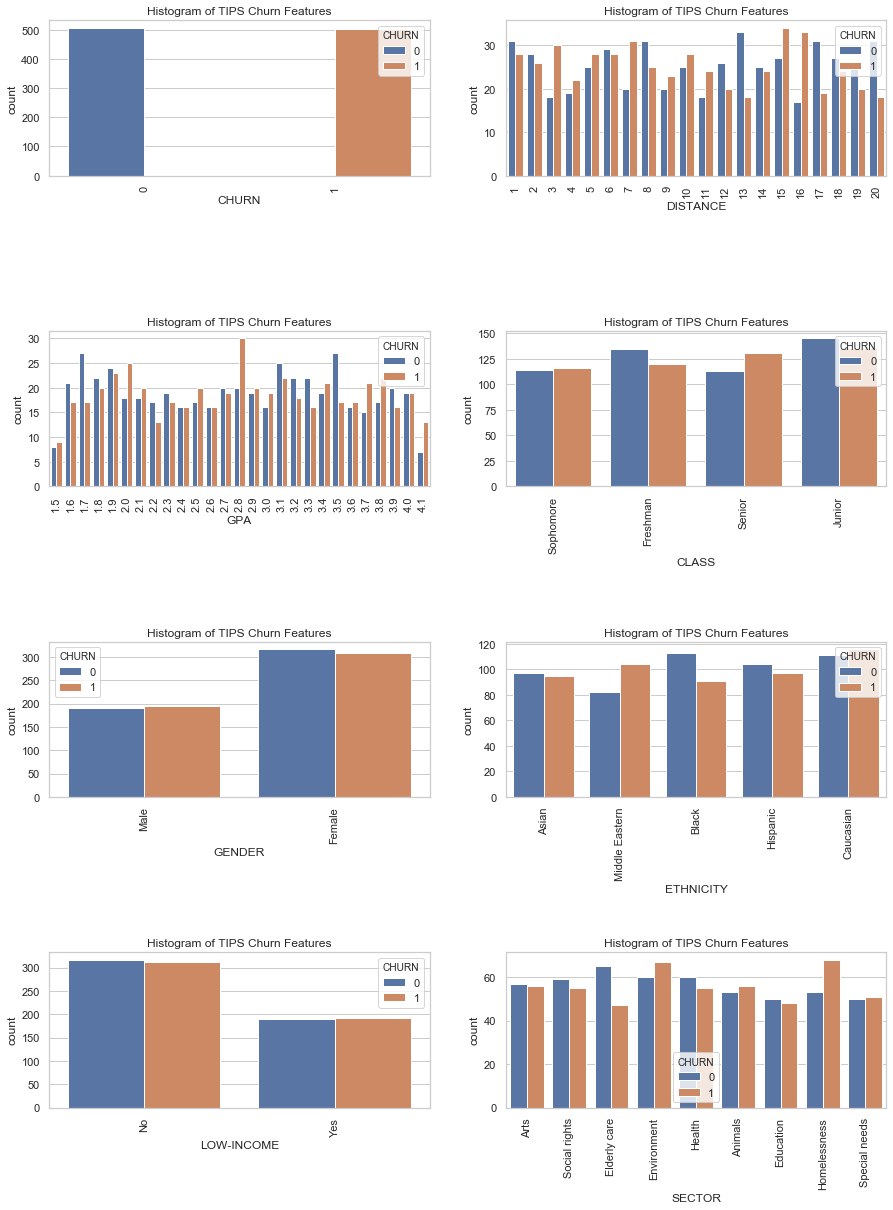

In [45]:
#### Histograms ####
plot_data = {'CHURN':ry, 'DISTANCE':f1, 'GPA':f2, 'CLASS':f_3, 'GENDER':f_4,'ETHNICITY':f_5, 'LOW-INCOME':f_6, 'SECTOR':f_7}
plotdf = pd.DataFrame(plot_data)

fig = plt.subplots(figsize=(15,20))
for i, j in enumerate(list(plotdf.columns)):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data = plotdf, hue = 'CHURN')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel=plotdf.columns[i])
    plt.title("Histogram of TIPS Churn Features")

# save image to pwd as png
plt.savefig('eda.png')


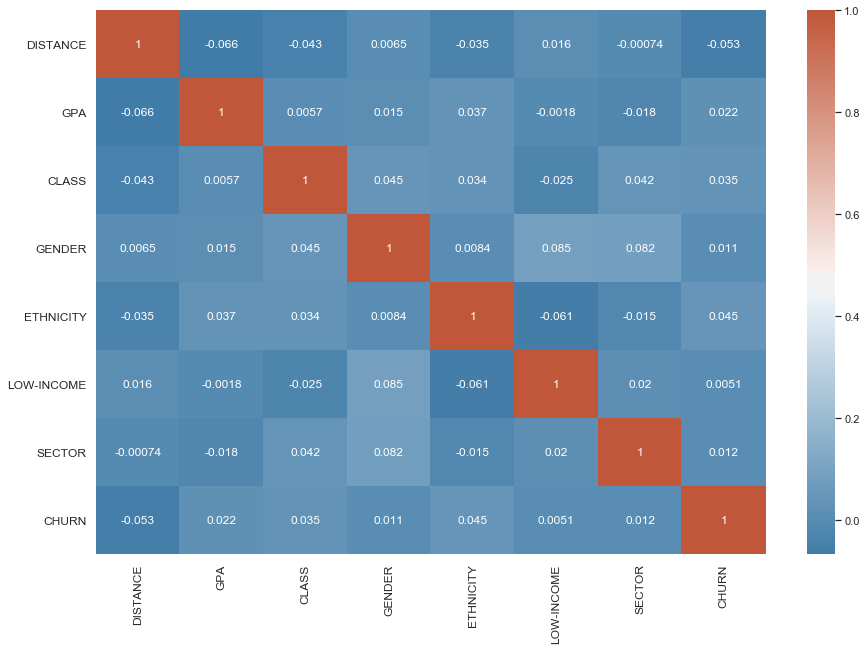

In [46]:
#### Correlation Matrix ####

corr = cdf.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values, 
            annot = True, 
            annot_kws={'size':12},
            cmap= sns.diverging_palette(240, 21, as_cmap=True))
heat_map=plt.gcf()
heat_map.set_size_inches(15,10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.show()

# save image to pwd as png
plt.savefig('corrogram.png')

<div align="center"><strong>___________________________________________________________________</strong></div>

#### **Churn Baseline**

In [47]:
ch=0
for i in cdf.CHURN:
    if i != 0:
        ch += 1
        
print("Baseline Accuracy: " , (ch/1010) ,"\n" )

Baseline Accuracy:  0.498019801980198 



<div align="center"><strong>___________________________________________________________________</strong></div>

#### **Cluster Analysis**

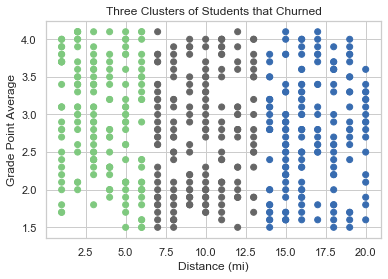

In [48]:
# Explore the influce of 'categories' on those students that left early
from sklearn.cluster import KMeans

# create clusters
churn_student = cdf[['DISTANCE', 'GPA']][cdf.CHURN == 1]
kmeans = KMeans(3, random_state = 0).fit(churn_student)

# display findings

churn_student['label'] = kmeans.labels_
plt.scatter(churn_student['DISTANCE'], 
            churn_student['GPA'],
            c=churn_student['label'], 
            cmap='Accent')
plt.xlabel('Distance (mi)')
plt.ylabel('Grade Point Average')
plt.title("Three Clusters of Students that Churned")
plt.show()

___

## 1.3 Building Churn Prediction Models

#### **Split Data for Classification**

In [49]:
#### prepare data for split -- features and response ####
from sklearn import preprocessing

X=cdf[['DISTANCE', 'GPA', 'CLASS', 'GENDER', 'ETHNICITY', 'LOW-INCOME', 'SECTOR']]
y=cdf['CHURN']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 


<div align="center"><strong>___________________________________________________________________</strong></div>

#### **Model: Gradient Boosting Classifier**

In [50]:
#### Build Model: Gradient Boosting Classifier ####

# Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Train the model using the training sets
gb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gb.predict(X_test)


In [51]:
#### Evaluate model ####

# module for accuracy calculation
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.45874587458745875
Precision: 0.4632352941176471
Recall: 0.4090909090909091


<div align="center"><strong>___________________________________________________________________</strong></div>

#### **Model: Logistic Regression Classifier**


In [52]:
#### Build Model: Logistic Regression ####
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Use logistic regression to get a model for our data
logisticRegr = LogisticRegression()
logisticRegr.fit(X=X_train, y=y_train)

# Calculate the model's prediction and display it's coeffecients.
test_y_pred = logisticRegr.predict(X_test)
confusion_matrix = confusion_matrix(y_test, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))

#### Evaluate Model ####
print('\nAccuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(X_test, y_test)))
print("\n", classification_report(y_test, test_y_pred),"\n\n")


Intercept: [-0.38791843]
Regression: [[-0.01814893  0.01368968  0.1089391   0.24049638  0.06606431  0.10264806
   0.02293401]]

Accuracy of logistic regression classifier on test set: 0.44

               precision    recall  f1-score   support

           0       0.44      0.51      0.47       149
           1       0.43      0.36      0.40       154

    accuracy                           0.44       303
   macro avg       0.44      0.44      0.43       303
weighted avg       0.44      0.44      0.43       303
 






Confusion matrix, without normalization
[[76 73]
 [98 56]]

Normalized confusion matrix
[[0.51 0.49]
 [0.64 0.36]]


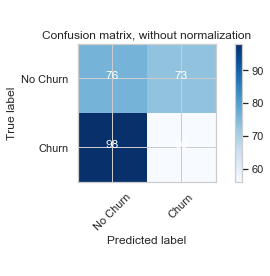

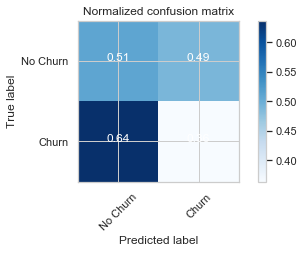

In [53]:
#### Plot Confussion Matrix ####
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    import itertools
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print('\n\nConfusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label\n\n')
    plt.tight_layout()


# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['No Churn', "Churn"]
plt.figure()
plot_confusion_matrix(confusion_matrix, classes= class_names,
                      title='\n\nConfusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

<div align="center"><strong>___________________________________________________________________</strong></div>

#### **Tree Based Classifiers**

In [54]:
#### Plot of Feature Importance ####

"""
    Plots histograms of features sorted by highest influence
    @param model is fitted model to be evalued
    @param model_name is string name used for plot title
"""

def feature_importance(model, model_name):
    # calculate feature importance
    importance = model.feature_importances_
    # decrementally sort feature importance
    indices = np.argsort(importance)[::-1]
    # sort features names to match sorted importance
    names = [X.columns[i] for i in indices]
    
    plt.figure()
    plt.title("Feature Importance " + model_name)
    plt.bar(range(X.shape[1]), importance[indices], color="lightblue")
    # bar names
    plt.xticks(range(X.shape[1]), names, rotation = 90)
    
    plt.show(names,importance)

In [55]:
#### Plot Trees ####

"""
    Generates a PDF visual of tree
    #!conda install python-graphviz
    @param t_model is fitted model e.g. decisionTree
"""

def plot_tree(t_model):
    plotTree = tree.export_graphviz(decisionTree, out_file=None, 
                         feature_names = list(X_train.columns.values),  
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = graphviz.Source(plotTree)
    graph.render('decision_tree', view=True)

<div align="center"><strong>___________________________________________________________________</strong></div>

#### **Model: Decision Trees Classifier**

In [56]:
#### Build Model: Decision Trees ####

from sklearn import tree
import graphviz 
 
# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth = 4)
 
# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=X_train, y=y_train)
decisionTree = decisionTree.fit(X=X_train, y=y_train)

#### plot tree ####
plot_tree(decisionTree)

Accuracy of decision tree classifier on test set: 0.49


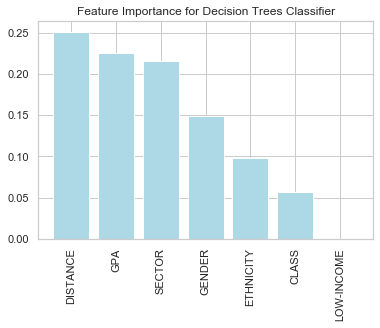

In [57]:
#### Trim Decision Tree ####
test_y_pred_dt = decisionTree.predict(X_test)

#### Evaluate Model ####
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(decisionTree.score(X_test, y_test)))

#### Plot Feature Importance ####
feature_importance(decisionTree, "for Decision Trees Classifier")

<div align="center"><strong>___________________________________________________________________</strong></div>

#### **Model Random Forrest Classifier**


Accuracy of random forest classifier on test set: 0.50


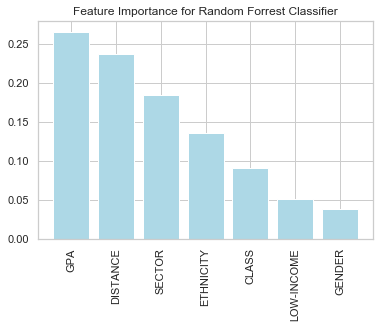

In [58]:
#### Build Model: Random Forrest ####
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest = randomForest.fit(X_train, y_train)

#### Evaluate Model ####
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(X_test, y_test)))

#### Plot Tree ####
plot_tree(randomForest)

#### Plot Feature Importance ####
feature_importance(randomForest, "for Random Forrest Classifier")

In [59]:
from sklearn import tree
i_tree = 0
for tree_in_forest in randomForest.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)#TODO?
    i_tree = i_tree + 1

___
___

## 2. Predict expected contribution given a donor's profile.

In [60]:
df = pd.read_csv('./data_seeds/donation_history_seed.csv')
df

,DonorID,Amount,Quarter,Year,Method,Luncheon,Parent,Alumni,Board
0,3621,50,First,2017,check,No,Yes,No,No
1,2359,100,Fourth,2018,online,Yes,No,Yes,No
2,7813,100,Third,2015,card,No,No,No,Yes
3,1209,80,Fourth,2015,check,Yes,No,No,No
4,7143,250,Second,2016,online,No,No,No,Yes
5,3621,25,Third,2018,card,No,Yes,No,No
6,6092,10,First,2017,online,No,No,Yes,No
7,1423,50,Fourth,2018,card,No,No,Yes,No
8,3704,100,First,2016,check,No,No,No,No
9,7246,75,Second,2015,online,No,No,No,No


## 2.1 Generate 500 unique rows of data using a seed data set of twenty rows.


#### **Regression data set**

In [61]:
rows = 500
n = int(rows/20)

# extract rows as lists for data generation
x1 = list(df['Quarter'])
x2 = list(df['Year'])
x3 = list(df['Method'])
x4 = list(df['Luncheon'])
x5 = list(df['Parent'])
x6 = list(df['Alumni'])
x7 = list(df['Board'])
y  = list(df['Amount']) 

# create 500 rows of content
f_1 = gen_str_data(x1, n)
f_2 = gen_str_data(x2, n)
f_3 = gen_str_data(x3, n)
f_4 = gen_str_data(x4, n)
f_5 = gen_str_data(x5, n)
f_6 = gen_str_data(x6, n)
f_7 = gen_str_data(x7, n)
ry = gen_int_data(y, 10, 300, n)

# change distribution based on attribute and split
g1 = change_split(f_1, "Second", 2)
g2 = change_split(f_2, "2018", 5)
g3 = change_split(f_3, "Card", 2)
g4 = change_split(f_4, "Yes", 8)
g5 = change_split(f_5, "Yes", 3)
g6 = change_split(f_6, "Yes", 3)
g7 = change_split(f_7, "Yes", 3)

# convert strings to label-encoded objects
f1 = label_enc(g1)
f2 = label_enc(g2)
f3 = label_enc(g3)
f4 = label_enc(g4)
f5 = label_enc(g5)
f6 = label_enc(g6)
f7 = label_enc(g7)

In [62]:
print(len(f1))
print(len(f2))
print(len(f3))
print(len(f4))
print(len(f5))
print(len(f6))
print(len(f7))
print(len(ry))

520
520
520
520
520
520
520
520


In [63]:
# combine lists into pandas dataframes
data = {'AMOUNT':ry, 'QUARTER':f1, 'YEAR':f2, 'METHOD':f3, 'LUNCHEON':f4,'PARENT':f5, 'ALUMNI':f6, 'BOARD':f7}
rdf = pd.DataFrame(data)

rdf.describe()

,AMOUNT,QUARTER,YEAR,METHOD,LUNCHEON,PARENT,ALUMNI,BOARD
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,149.519231,1.453846,1.465385,1.036538,0.615385,0.598077,0.584615,0.598077
std,81.416338,1.112975,1.085353,0.800176,0.486973,0.490759,0.493263,0.490759
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,147.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,221.250000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,299.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000


___

### 2.2 Explore Features and Data

In [64]:
bucket_ry = pd.cut(rdf.AMOUNT, bins=5)
plot_data = {'AMOUNT':ry, 'QUARTER':g1, 'YEAR':g2, 'METHOD':g3, 'LUNCHEON':g4}
plotdf = pd.DataFrame(plot_data)

#### **Exploratory Data Analysis (EDA)**

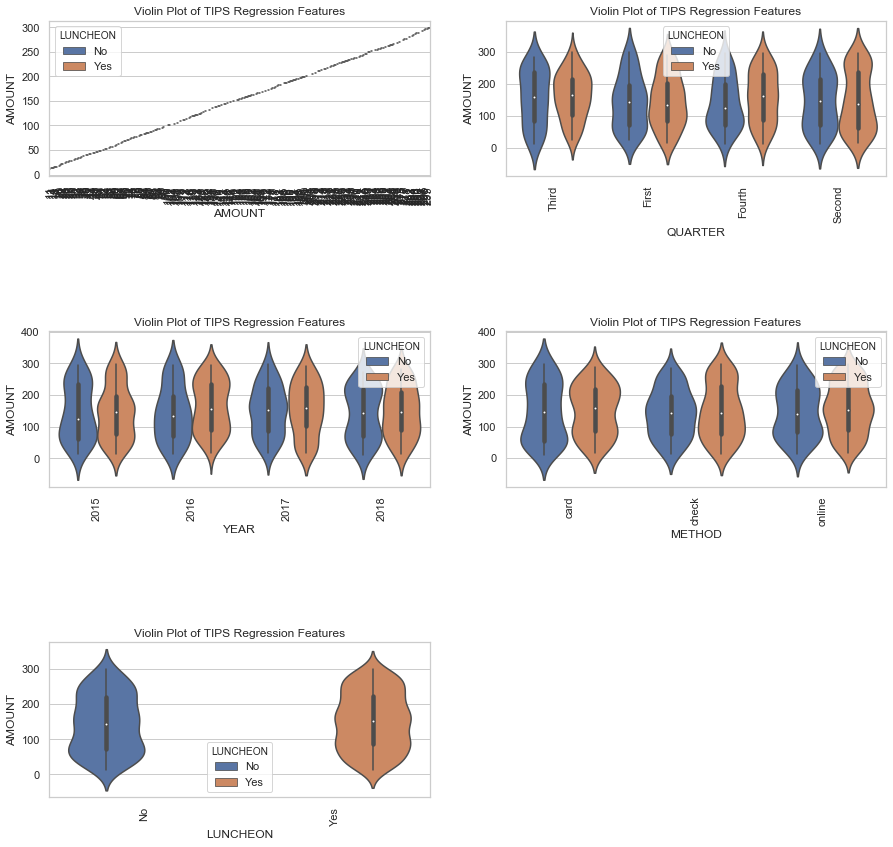

In [65]:
#### Boxplots ####

# Fixing random state for reproducibility
np.random.seed(115)

# Horizontal violin plot
fig, axes = plt.subplots(figsize=(15,20))
for i, j in enumerate(list(plotdf.columns)):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.violinplot(x=j, y = "AMOUNT", data = plotdf, hue="LUNCHEON")
    plt.xticks(rotation=90)
    plt.title("Violin Plot of TIPS Regression Features")

# save image to pwd as png
plt.savefig('regeda.png')

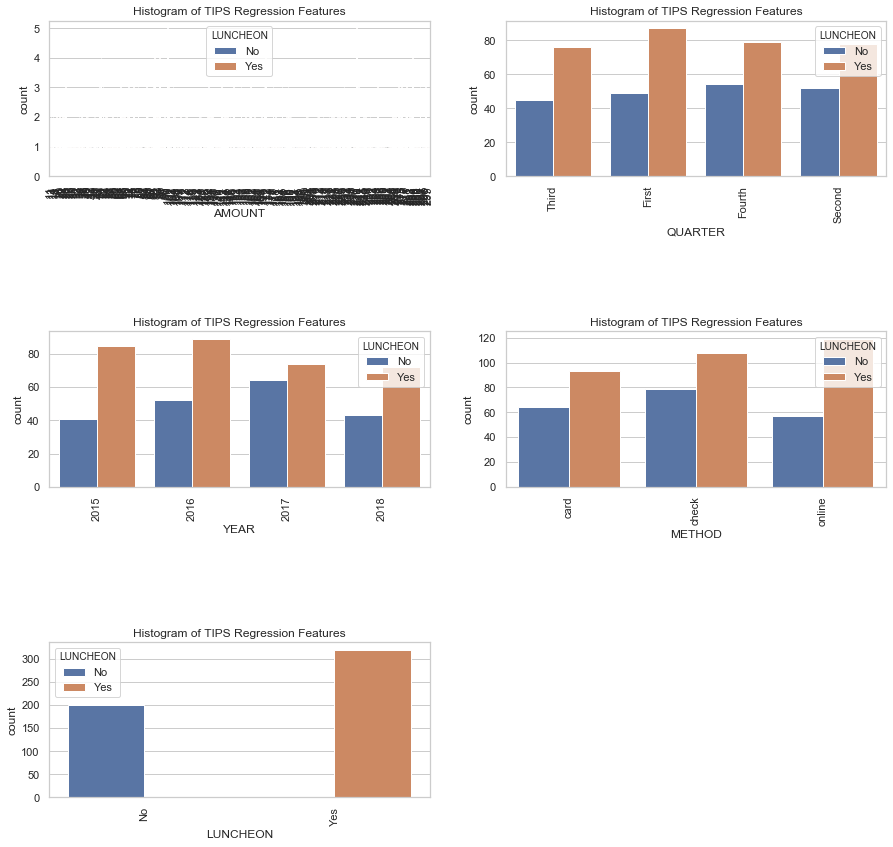

In [66]:
#### Histograms ####

fig = plt.subplots(figsize=(15,20))
for i, j in enumerate(list(plotdf.columns)):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data = plotdf, hue = 'LUNCHEON')
    plt.xticks(rotation=90)
    plt.title("Histogram of TIPS Regression Features")

# save image to pwd as png
plt.savefig('regeda2.png')

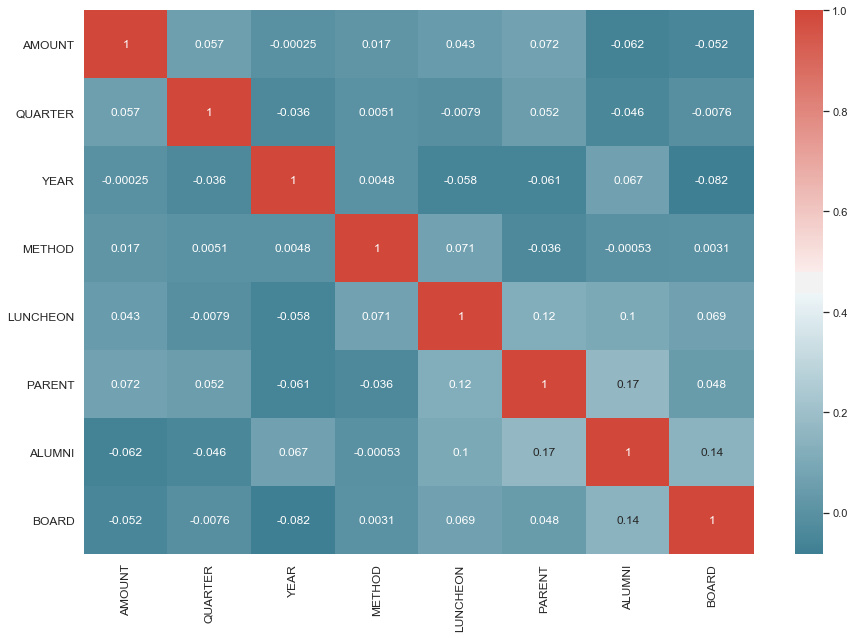

In [67]:
#### Correlation Matrix ####

corr = rdf.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values, 
            annot = True, 
            annot_kws={'size':12},
            cmap= sns.diverging_palette(220, 15, as_cmap=True)) # TODO?
heat_map=plt.gcf()
heat_map.set_size_inches(15,10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.show()

# save image to pwd as png
plt.savefig('corrogram2.png')

___

## 1.3 Build Expected Donation Models

#### **Feature Engineering: Period**

In [68]:
# Zip year and quarter into single feature
period =[str(m)+str(n) for m,n in zip(g2,f1)]

per = label_enc(period)

pdata = {'AMOUNT':ry, 'PERIOD':per, 'METHOD':f3, 'LUNCHEON':f4,'PARENT':f5, 'ALUMNI':f6, 'BOARD':f7}
pdf = pd.DataFrame(pdata)
pdf.head()

,AMOUNT,PERIOD,METHOD,LUNCHEON,PARENT,ALUMNI,BOARD
0,50,3,0,0,1,0,1
1,100,4,1,1,0,0,0
2,100,12,2,1,0,0,1
3,80,1,1,0,1,0,1
4,250,9,1,0,0,0,0


#### **Split Data for Prediction**

In [69]:
from sklearn import preprocessing

#### Sort Time Stamped Data ####
pdf.sort_values(by=['PERIOD'], inplace=True)

#### prepare data for split -- features and response ####
X=pdf[['PERIOD', 'METHOD', 'LUNCHEON', 'PARENT', 'ALUMNI', 'BOARD']]
pdf['LOG_AMOUNT'] = np.log10(pdf['AMOUNT'])
y=pdf['LOG_AMOUNT']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=115) 


<div align="center"><strong>___________________________________________________________________</strong></div>

#### **Model: Linear Regression**

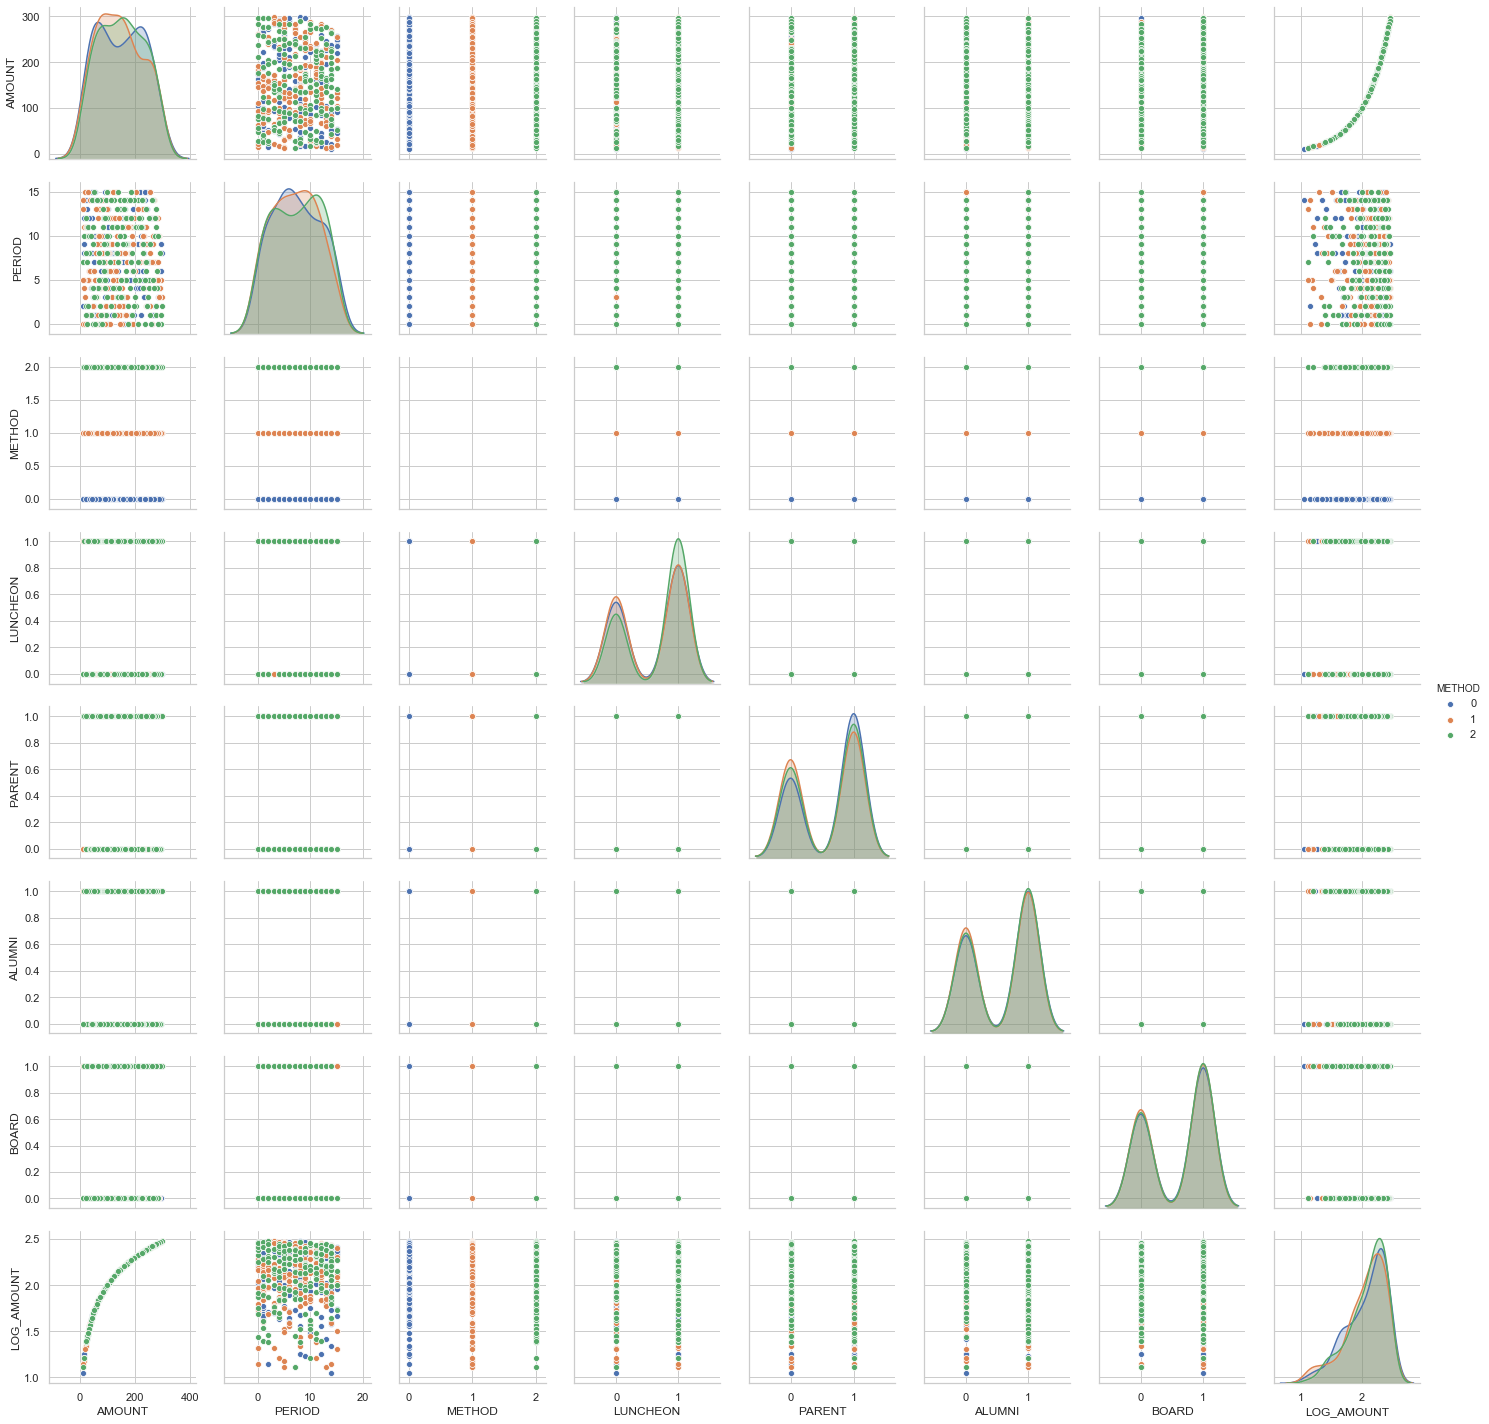

In [70]:
sns.pairplot(pdf, hue = "METHOD")
# save image to pwd as png
plt.savefig('Regr_Corr_Plot.png')

In [71]:
# Sanity check -- ensure dimensions match
print(len(X_test), len(y_test))
print(len(y_pred))

130 130
303


In [72]:
#### Build Model: Linear Regression ####

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Train the model
LinearRegr = LinearRegression()
LinearRegr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = LinearRegr.predict(X_test)

#### Explore Model ####
# The intercept
print('\nIntercept: ', LinearRegr.intercept_)

# The coefficients
print('\nCoefficients:', LinearRegr.coef_)

# Explained variance score: 1 is perfect prediction
print('\nVariance score: %.2f' % r2_score(y_test, y_pred))


#### Evaluate Model ####
# MAE
print("\n\nMAE: %.23f" % mean_absolute_error(y_test, y_pred))

# MSE
print("\nMSE: %.23f" % mean_squared_error(y_test, y_pred))

# MAE
print("\nRMSE: %.23f" % np.sqrt(mean_absolute_error(y_test, y_pred)))


Intercept:  2.090686155174625

Coefficients: [ 0.   -0.02  0.04  0.06 -0.08 -0.02]

Variance score: -0.06


MAE: 0.26065196637593485151640

MSE: 0.10713287687759191768588

RMSE: 0.51054085671563531612094


<div align="center"><strong>___________________________________________________________________</strong></div>

#### **Model: Logistic Regression**

<div align="center"><strong>___________________________________________________________________</strong></div>

#### **Model: Linear Regression**


In [73]:
from sklearn.linear_model import LogisticRegression

# Train the model
LogRegr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
LogRegr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = LogRegr.predict_proba(X_test)

#### Explore Model ####
# The intercept
print('\nIntercept: ', LogRegr.intercept_)

# The coefficients
print('\nCoefficients:', LogRegr.coef_)

# Explained variance score: 1 is perfect prediction
print('\nVariance score: %.2f' % r2_score(y_test, y_pred))


#### Evaluate Model ####
# MAE
print("\n\nMAE: %.23f" % mean_absolute_error(y_test, y_pred))

# MSE
print("\nMSE: %.23f" % mean_squared_error(y_test, y_pred))

# MAE
print("\nRMSE: %.23f" % np.sqrt(mean_absolute_error(y_test, y_pred)))

ValueError: Unknown label type: 'continuous'

# Advanced Synthetic Data Generation

### Need for Synthetic Data

What is the need for synthetic data? Well, finding good datasets to employ different ML techniques is hard, and these datasets still have limitations in terms of the number of samples available and the patterns within them. Drawing conclusions also may be limited as a result of the data available. However, synthetic data solves this problem and can help in understanding more about computational effeciencies and intricacies about ML techniques such as the ones explored below. By drawing conclusions about data itself, it can even be used to replace real data which may be protected or shielded for [privacy concerns](https://www.ijstr.org/final-print/mar2017/A-Review-Of-Synthetic-Data-Generation-Methods-For-Privacy-Preserving-Data-Publishing.pdf).

### What type of  data can be synthetically generated?
One of the great things about synthetic data is that the type of data can be numerical, categorical, or ordinal. It is usally generated through random selection from a distribution picked by the developer/user. 

In [74]:
from sklearn.datasets import make_regression

In [75]:
# Generate a regression problem with 20 rows of data built using one informative feature
# Informative features are used to build the problem and then each feature is given as an individual problem.
# Thus x1, and x2 will both have a solution that is built using the same informative feature.

data1 = make_regression(n_samples=20, n_features=1, n_informative=1, coef=True)
df1 = pd.DataFrame(data1[0], columns=['x'])
df1['y'] = data1[1]

In [76]:
df1.head()

,x,y
0,0.318049,22.521044
1,0.621787,44.028650
2,-0.826182,-58.501858
3,0.224987,15.931325
4,-1.808471,-128.057693


## Regression

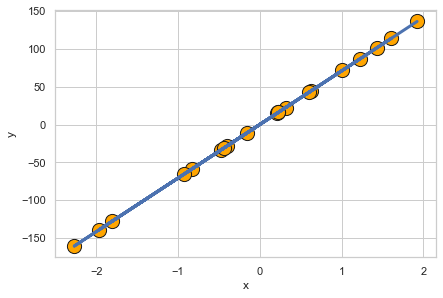

In [92]:
# Graph both the features versus the output and try to find the regression line

plt.figure(figsize=(15, 10))
def graph_feature():
    # First let's get the line of best fit for each feature and generate a corresponding equation for it
    coeffecients = np.polyfit(df1['x'], df1['y'], deg=1)
    equation = np.poly1d(coeffecients)
    
    # Graph the line of best fit versus the data for the feature
    ax = plt.subplot(2, 2, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.scatter(df1['x'], df1['y'], s=200, c='orange', edgecolor='k')
    plt.plot(df1['x'], equation(df1['x']), 'b-', lw=3)
    
graph_feature()

## Adding Noise

You may notice that the above has a feature that correlates almost perfectly to a straight line.
This is very uncommon in the real world. We will now generate a similar problem but with added [noise](https://en.wikipedia.org/wiki/Noisy_data).

In [93]:
# Similar problem but use a Guassian with SD 20 to model the noise in our system
data2 = make_regression(n_samples=20, n_features=1, n_informative=1, noise=20.0)

df2 = pd.DataFrame(data2[0], columns=['x'])
df2['y'] = data2[1]

In [94]:
df2.head()

,x,y
0,0.861412,76.175072
1,-0.703392,-48.201758
2,-0.777004,-60.133453
3,-0.806890,-53.481063
4,-0.256246,-30.648511


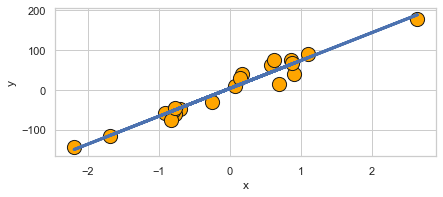

In [96]:
# Graph both the features versus the output and try to find the regression line

plt.figure(figsize=(15, 6))
def graph_feature_with_noise():
    # First let's get the line of best fit for each feature and generate a corresponding equation for it
    coeffecients_with_noise = np.polyfit(df2['x'], df2['y'], 1)
    equation_with_noise = np.poly1d(coeffecients_with_noise)
    
    # Graph the line of best fit versus the data for the feature
    ax = plt.subplot(2, 2, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.scatter(df2['x'], df2['y'], s=200, c='orange', edgecolor='k')
    plt.plot(df2['x'], equation_with_noise(df2['x']), 'b-', lw=3)
    
graph_feature_with_noise()

Note: As you see, the data is a lot more widely distributed, although the amount of noise is exaggerated in this scenario. Playing around with the number of features and informative features can help create a lot more interesting problems!

## Classification

In [97]:
from sklearn.datasets import make_classification

In [98]:
# Generate a classification problem with 20 rows of data built using one two informative features
# Informative features are used to build the problem.
# Redundant features are random linear combinations of informative features
# Repeated features are as the name implies duplicates of either informative or redundant features
# Thus, the number of features is comprised of informative, redundant, and repeated features, and possibly additional useless ones as well.

data3 = make_classification(n_samples=20, n_features=3, n_informative=3, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=1.0, 
                            hypercube=True)
df3 = pd.DataFrame(data3[0],columns=['x1', 'x2', 'x3'])
df3['y'] = data3[1]

In [99]:
df3.head()

,x1,x2,x3,y
0,-0.654899,0.368329,1.240586,1
1,0.704853,0.132663,-1.284943,0
2,1.069741,-0.261338,-1.418446,0
3,-0.644997,0.180449,-0.058067,1
4,-0.604831,0.869663,0.588598,1


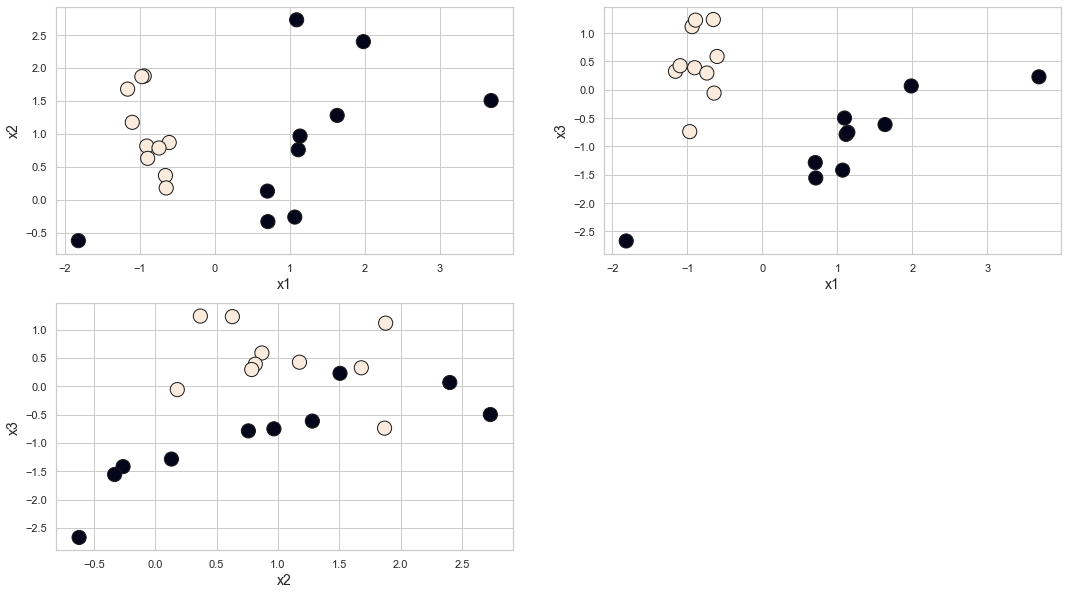

In [100]:
from itertools import combinations
from math import ceil

# Find out the number of 2-feature combinations and assemblem them into a list
lst_var = list(combinations(df3.columns[:-1], 2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))

# Plot each feature against each other generating a classification problem
for i in range(1, len_var+1):
    plt.subplot(2, ceil(len_var/2), i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df3[var1], df3[var2], s=200, c=df3['y'], edgecolor='k')
    plt.xlabel(var1, fontsize=14)
    plt.ylabel(var2, fontsize=14)

Note: Changing the values of `class-sep`, the distance between clases can make the separation between the two classes a lot easier or a lot harder. Changing `flip-y`, the proportion of data points that are randomnly classified can also make the data, a lot harder to classify (this is how we **add noise** in a classification problem) 

## Clustering

In classification, we generally know the labels or objects that data are assoicated with (in the example above we know that each point is either a 0 or a 1), but what if that is not the case? Given groups of unlabeled data, clustering is a technique used to group data based on density patterns.

In [101]:
from sklearn.datasets import make_blobs

In [102]:
data4 = make_blobs(n_samples=60, n_features=3, centers=3, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['x'+ str(i) for i in range(1,4)])
df4['y'] = data4[1]

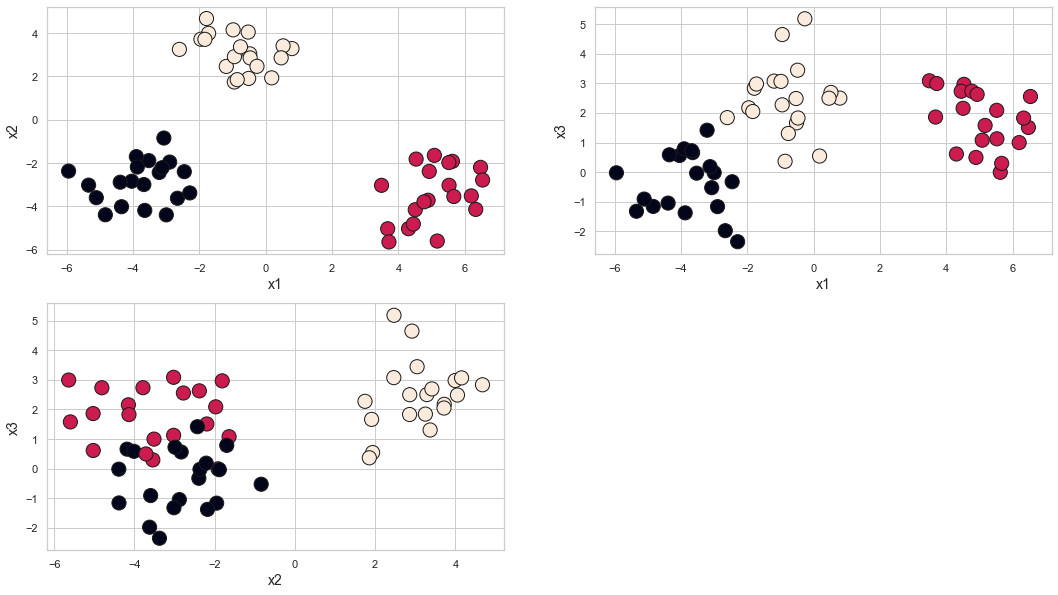

In [103]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1, len_var+1):
    plt.subplot(2, ceil(len_var/2), i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1], df4[var2], s=200, c=df4['y'], edgecolor='k')
    plt.xlabel(var1, fontsize=14)
    plt.ylabel(var2, fontsize=14)

But many more types of clustering problems exist. For example, a few more well knows ones are anisotropic cluster generation, concetric ring cluster generation, or even moon cluster generation.

### Anisotropic Cluster Generation

In [108]:
data5 = make_blobs(n_samples=50, n_features=2, centers=3, cluster_std=1.5)

In [109]:
transformation = [[0.5, -0.5], [-0.4, 0.8]]

In [110]:
data5_0 = np.dot(data5[0], transformation)
df5 = pd.DataFrame(data5_0, columns=['x'+ str(i) for i in range(1,3)])
df5['y'] = data5[1]

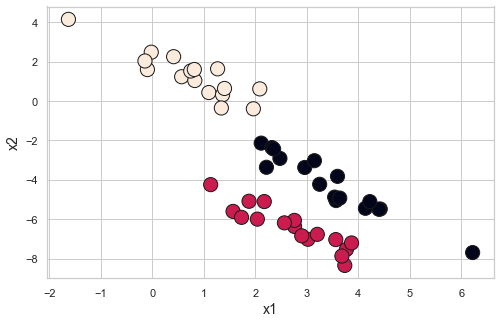

In [111]:
plt.figure(figsize=(8,5))
plt.scatter(df5['x1'], df5['x2'], c=df5['y'], s=200, edgecolors='k')
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.show()

### Concentric Ring Cluster Generation

In [114]:
from sklearn.datasets import make_circles

In [115]:
data6 = make_circles(n_samples=50, shuffle=True, noise=None, random_state=None, factor=0.6)
df6 = pd.DataFrame(data6[0], columns=['x' + str(i) for i in range(1,3)])
df6['y'] = data6[1]

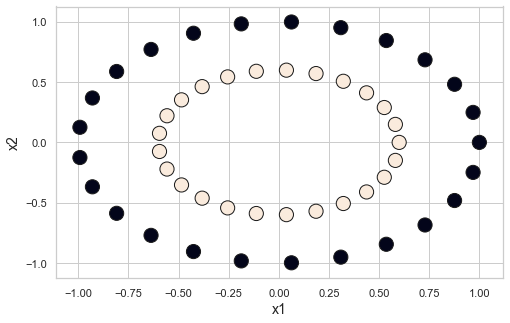

In [117]:
plt.figure(figsize=(8,5))
plt.scatter(df6['x1'], df6['x2'], c=df6['y'], s=200, edgecolors='k')
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.show()

In [ ]:
# Mention GAANZ
# Data Validation
# Add a HW folder